## Image Analysis

Images are a common form of data encountered in scientific disciplines from astronomy to medicine to metallurgy and knowing how to work with them is a valuable skillset. Image analysis tools are becoming increasingly powerful allowing researchers to ask new questions and speed us existing workflows. Machine learning methods that we are learning about right now have also been applied to image analysis and can do some things that start to sound like science fiction: facial recognition and robots that can see and interact with their environment. We won't be doing anything on that level here in class, but we will get you on the right track to feeling comfortable with interacting with images in Python and giving you a set of tools to do some introductory analyses of common imaging problems.

In **Lecture 1**, we will learn how to import, save, and interact with image datasets, learn some basics about images, and introduce [**scikit-learn**](https://scikit-image.org/) or **skimage**, a collection of tools for image processing workflows.

In **Lecture 2** we will apply the tools from skimage to perform a common image analysis task: image registration and calculation of morphological properties of objects in the image.

## Importing and Saving Images

First off, in order to work with images, we need to be able to read them into our Jupyter notebook. We will interact with images as a variable within our workspace. For the purposes of this demonstration, we will be using images from the `skimage.data module`. We will also import the `skimage.io` module, which has a useful set of functions for importing, displaying, and saving images.

In [36]:
import skimage
import skimage.io as sio
import matplotlib.pyplot as plt

from skimage import data

Our first example will use an image of a photographer, and store it as the variable `camera`. 

In [10]:
camera = data.camera()

You may be curious what this object is, so let's check `type(camera)`:

In [14]:
type(camera)

numpy.ndarray

Ah, so `skimage` reads in images as numpy arrays. Digital images in fact are nothing more than an array of pixel intensities, so numpy arrays are a natural medium for image datasets. Other things you may want to check about your image is the datatype of each individal pixel and the size of the image, and maybe check a small subset of the data:

In [15]:
camera.dtype

dtype('uint8')

In [16]:
camera.shape

(512, 512)

In [17]:
camera[0:10, 0:10]

array([[156, 157, 160, 159, 158, 156, 155, 156, 158, 157],
       [156, 157, 159, 158, 158, 156, 155, 156, 158, 157],
       [158, 157, 156, 156, 157, 157, 157, 157, 157, 158],
       [160, 157, 154, 154, 156, 157, 158, 157, 157, 158],
       [158, 157, 156, 156, 157, 156, 155, 155, 157, 157],
       [156, 157, 159, 159, 159, 156, 154, 155, 158, 157],
       [158, 157, 156, 156, 157, 156, 155, 155, 157, 157],
       [160, 157, 154, 154, 156, 157, 158, 157, 157, 158],
       [158, 155, 153, 153, 155, 157, 158, 158, 158, 157],
       [156, 154, 153, 153, 155, 157, 159, 159, 159, 157]], dtype=uint8)

So our image has 512 x 512 pixels, and each pixel is an 8-bit unsigned integer. This means that each pixel can be assigned a value between 0 and $2^8 - 1$. Good to know. But something you may want to do is convert between image types. Why care? Depending on the image type, they will take up different amounts of space.

We can import a set of utility functions from `skimage.util` to do this:

In [20]:
import skimage.util as skt

In [26]:
skt.img_as_float(camera)

array([[0.61176471, 0.61568627, 0.62745098, ..., 0.59607843, 0.59607843,
        0.59607843],
       [0.61176471, 0.61568627, 0.62352941, ..., 0.59607843, 0.59607843,
        0.59607843],
       [0.61960784, 0.61568627, 0.61176471, ..., 0.59607843, 0.59607843,
        0.59607843],
       ...,
       [0.4745098 , 0.48235294, 0.49411765, ..., 0.4745098 , 0.44313725,
        0.43529412],
       [0.4745098 , 0.48235294, 0.49411765, ..., 0.4745098 , 0.44313725,
        0.43529412],
       [0.4745098 , 0.48235294, 0.49411765, ..., 0.4745098 , 0.44313725,
        0.43529412]])

Let's check what difference it makes in file size. We can save to a file using `sio.imsave`:

In [27]:
sio.imsave('camera.tif', camera)
sio.imsave('camera_float.tif', skt.img_as_float(camera))

In [31]:
import os
import numpy as np

print("The file 'camera.tif' is {} KB".format(np.round(os.stat('camera.tif').st_size/1000, 2)))
print("The file 'camera_float.tif' is {} KB".format(np.round(os.stat('camera_float.tif').st_size/1000, 2)))

The file 'camera.tif' is 262.41 KB
The file 'camera_float.tif' is 2097.42 KB


That's a big difference! There was a 10-fold change in size when we went from uint8 images to float-64 images. Keep that in mind when analyzing datasets, especially if you are dealing with very large images like tilescans or videos.

## Image Compression and Resolution

Now would probably be a good time to talk about image formats too. You noticed that I saved the file with a `.tif` extension. What is that? It may be new to you, it may be not. Perhaps you have used `.png` or `.jpeg` or `.gif` file formats. [Here's](https://www.photoup.net/differences-between-file-formats-raw-dng-tiff-gif-png-jpeg/) a good explanation that talks about the most common types. In summary,

* **TIF** (Tagged Image File Format) is very common in scientific imaging. It is lossless (meaning that you don't lose any information during the compression process). The downside is they are extremely large. They also have compatibility issues when using in HTML.

* **GIF** (Graphics Interchange Format): very small, which is useful for animated images on the internet. Perhaps not the most useful for scientific purposes, because they are extremely lossy.

* **PNG** (Portable Network Graphics): some data compression like GIFS, but no loss of information. Probably a good option for some scientific applications.

* **JPEG** (Joint Photographic Experts Group) renders high quality image, has more compression than PNG, but some loss of information.

But what difference does that make on filesize? Let's check:

In [32]:
sio.imsave('camera.gif', camera)
sio.imsave('camera.jpeg', camera)
sio.imsave('camera.png', camera)

In [33]:
print("The file 'camera.tif' is {} KB".format(np.round(os.stat('camera.tif').st_size/1000, 2)))
print("The file 'camera.gif' is {} KB".format(np.round(os.stat('camera.gif').st_size/1000, 2)))
print("The file 'camera.jpeg' is {} KB".format(np.round(os.stat('camera.jpeg').st_size/1000, 2)))
print("The file 'camera.png' is {} KB".format(np.round(os.stat('camera.png').st_size/1000, 2)))

The file 'camera.tif' is 262.41 KB
The file 'camera.gif' is 280.61 KB
The file 'camera.jpeg' is 28.21 KB
The file 'camera.png' is 116.22 KB


It looks like file format can make a between 2- and 10-fold difference in file size. 

The last thing we will look at that can impact file size is image resolution. But before we do that, let's actually look at our image. In the first twenty minutes talking about image analysis, and we haven't even pulled up an image!

(-0.5, 511.5, 511.5, -0.5)

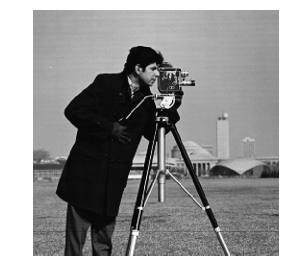

In [37]:
sio.imshow(camera)
plt.axis('off')

Nice. You can adjust the contrast of the image (for display purposes only-- it doesn't impact the data) using the `vmin` and `vmax` arguments

(-0.5, 511.5, 511.5, -0.5)

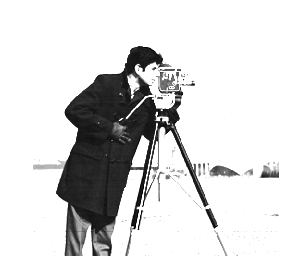

In [38]:
sio.imshow(camera, vmin=0, vmax=90)
plt.axis('off')

Remember that our original image is 512 x 512 pixels. What if we want to reduce the resolution by, say, 10-fold? We can use a command from the `skimage.transform` module to assist us with that:

In [39]:
from skimage.transform import rescale

Shape of 0.1x image: (51, 51)


c:\users\koolk\anaconda3\envs\chad\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
c:\users\koolk\anaconda3\envs\chad\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\koolk\anaconda3\envs\chad\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(-0.5, 50.5, 50.5, -0.5)

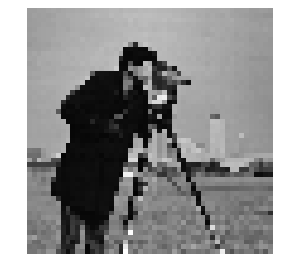

In [40]:
camera01 = rescale(camera, 0.1)

print('Shape of 0.1x image: {}'.format(camera01.shape))

sio.imshow(camera01)
plt.axis('off')

Similarly, you can increase the resolution using the `rescale` function. Keep in mind, this won't magically increase the image quality. It will just have a lot of replicate pixels. It can be useful though when you need to map a lower resolution image with a higher resolution image.

Shape of 10x image: (5120, 5120)


(-0.5, 5119.5, 5119.5, -0.5)

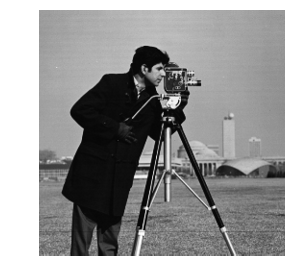

In [41]:
camera10 = rescale(camera, 10)

print('Shape of 10x image: {}'.format(camera10.shape))

sio.imshow(camera10)
plt.axis('off')

How big of an effect do you think image resolution will have on file size?

In [42]:
sio.imsave('camera01.tif', camera01)
sio.imsave('camera10.tif', camera10)

In [43]:
print("The file 'camera.tif' is {} KB".format(np.round(os.stat('camera.tif').st_size/1000, 2)))
print("The file 'camera01.tif' is {} KB".format(np.round(os.stat('camera01.tif').st_size/1000, 2)))
print("The file 'camera10.tif' is {} KB".format(np.round(os.stat('camera10.tif').st_size/1000, 2)))

The file 'camera.tif' is 262.41 KB
The file 'camera01.tif' is 21.07 KB
The file 'camera10.tif' is 209715.47 KB


You can see that by accounting for data type, compression, and resolution, images can $~10^4 - 10^5$ orders of magnitude! Again, something you will definitely need to account for when planning your data storage.

## Working in Color

What if we're working with color images? Well, color images have an extra dimension:

In [44]:
cat = data.chelsea()

In [45]:
cat.shape

(300, 451, 3)

(-0.5, 450.5, 299.5, -0.5)

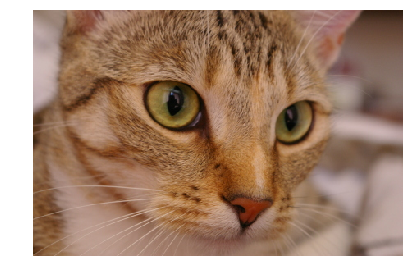

In [47]:
sio.imshow(cat)
plt.axis('off')

Color images are represented using a **color space**. One of the most common, with which you are probably familiar, is the **RGB space**, with a red, green, and blue channel. We can break the above image into its respective RGB components by selecting the appropriate channel in the numpy array. 

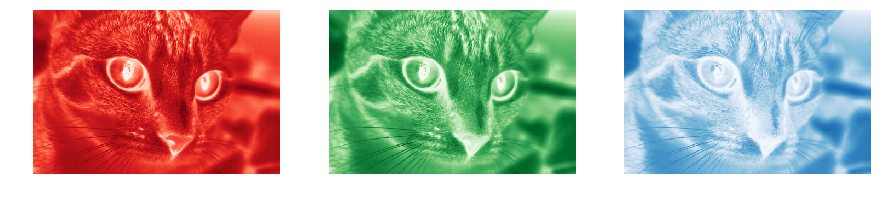

In [72]:
fig, axes = plt.subplots(figsize=(15, 6), ncols=3)
colors = ['Reds', 'Greens', 'Blues']

counter = 0
for ax, color in zip(axes, colors):
    ax.imshow(cat[:, :, counter], cmap=color)
    ax.axis('off')
    counter += 1

To visualize the RGB space, think of each component as a dimension in a cube:

![alt text](https://en.wikipedia.org/wiki/HSL_and_HSV#/media/File:RGB_Cube_Show_lowgamma_cutout_b.png "RGB Cube")

But the RGB color space isn't the only one available, and often isn't the most useful. Introducing the HSV color space, which stands for:

* hue
* saturation
* intensity

In [64]:
from skimage.color import rgb2hsv

In [65]:
cat_hsv = rgb2hsv(cat)

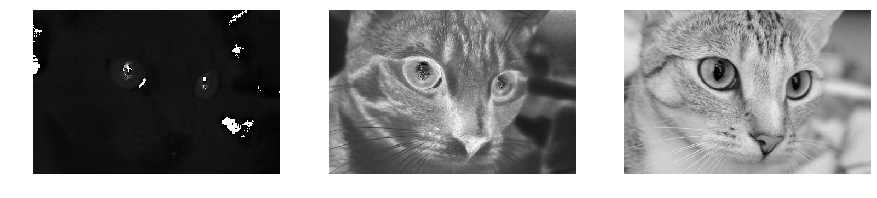

In [76]:
fig, axes = plt.subplots(figsize=(15, 6), ncols=3)
#colors = ['Reds', 'Greens', 'Blues']

counter = 0
for ax, color in zip(axes, colors):
    ax.imshow(cat_hsv[:, :, counter], cmap='gray')
    ax.axis('off')
    counter += 1